In [175]:
import random 
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [176]:
gray_image = cv2.imread('1.bmp', 
                 cv2.IMREAD_GRAYSCALE) 
plt.imshow(gray_image,cmap='gray')
plt.show()

In [205]:
def add_periodic_diagonal_noise(image, noise_amplitude):
    # Convert image to frequency domain
    fft_image = np.fft.fft2(image)
    # fft_image = np.fft.fftshift(fft_image)

    # Create a noise pattern
    rows, cols = gray_image.shape
    crow, ccol = int(rows/2), int(cols/2)
    u = np.linspace(-ccol, ccol, cols)
    v = np.linspace(-crow, crow, rows)
    U, V = np.meshgrid(u, v)


    N = 128
    x, y = np.meshgrid(u, v)

    k = 8
    m = np.cos(2*np.pi/N*k*(-x-y))
    plt.imshow(m,cmap='gray')
    plt.show()

    M = np.fft.fft2(m)
    Ms = np.fft.fftshift(M)
    # Add noise to the FFT image
    noisy_fft_image = fft_image + 10 * M

    # Convert back to spatial domain
    noisy_image = np.real(np.fft.ifft2(noisy_fft_image))
    # noisy_image = np.real(np.fft.ifftshift(noisy_image))

    return noisy_image.astype(np.uint8)


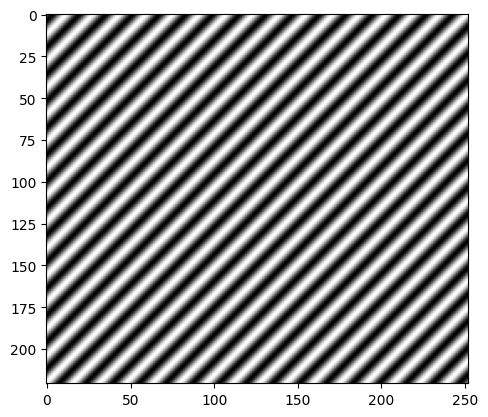

[[8.06850595+0.j         8.10006794+0.10098584j 8.1962934 +0.2044028j
  ... 8.36199243-0.31288368j 8.1962934 -0.2044028j
  8.10006794-0.10098584j]
 [8.10993141+0.11529329j 8.17652848+0.21821783j 8.30894752+0.32545016j
  ... 8.29679803-0.19239209j 8.16775025-0.08754468j
  8.10676953+0.01417643j]
 [8.23686943+0.2342431j  8.339929  +0.3412712j  8.51065374+0.45459394j
  ... 8.31667574-0.07459601j 8.22378115+0.0287622j
  8.19819869+0.1308877j ]
 ...
 [8.45774416-0.36090823j 8.38158334-0.25302812j 8.37045303-0.14827949j
  ... 9.10311329-0.73022778j 8.81244974-0.5964477j
  8.59995319-0.47444703j]
 [8.23686943-0.2342431j  8.19819869-0.1308877j  8.22378115-0.0287622j
  ... 8.75579768-0.57723364j 8.51065374-0.45459394j
  8.339929  -0.3412712j ]
 [8.10993141-0.11529329j 8.10676953-0.01417643j 8.16775025+0.08754468j
  ... 8.51293166-0.43978784j 8.30894752-0.32545016j
  8.17652848-0.21821783j]]


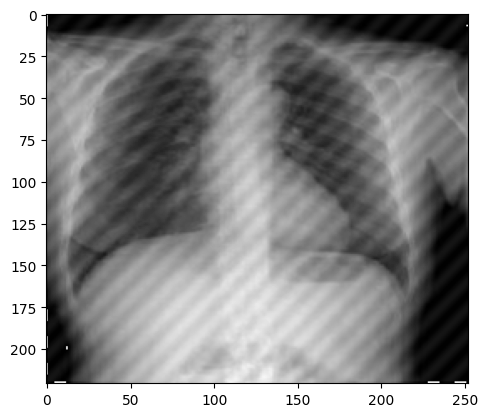

In [206]:
new = add_periodic_diagonal_noise(gray_image.copy(), 10)
plt.imshow(new,cmap='gray')
plt.show()